In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Chargement des fichiers CSV
ratings_df = pd.read_csv('ratings.csv')
restaurants_df = pd.read_csv('restaurants.csv')
restaurant_cuisines_df = pd.read_csv('restaurant_cuisines.csv')
consumers_df = pd.read_csv('consumers.csv')
consumer_preferences_df = pd.read_csv('consumer_preferences.csv')

In [5]:
# Aperçu des premières lignes de chaque fichier
print(ratings_df.head())
print(restaurants_df.head())
print(restaurant_cuisines_df.head())
print(consumers_df.head())
print(consumer_preferences_df.head())

  Consumer_ID  Restaurant_ID  Overall_Rating  Food_Rating  Service_Rating
0       U1077         135085               2            2               2
1       U1077         135038               2            2               1
2       U1077         132825               2            2               2
3       U1077         135060               1            2               2
4       U1068         135104               1            1               2
   Restaurant_ID                Name             City            State  \
0         132560  Puesto de Gorditas  Ciudad Victoria       Tamaulipas   
1         132561          Cafe Ambar  Ciudad Victoria       Tamaulipas   
2         132564            Church's  Ciudad Victoria       Tamaulipas   
3         132572        Cafe Chaires  San Luis Potosi  San Luis Potosi   
4         132583    McDonalds Centro       Cuernavaca          Morelos   

  Country  Zip_Code   Latitude   Longitude Alcohol_Service Smoking_Allowed  \
0  Mexico       NaN  23.752304  -

In [6]:
#Explorer les données
print("Ratings DataFrame:")
print(ratings_df.describe(include='all'))

Ratings DataFrame:
       Consumer_ID  Restaurant_ID  Overall_Rating  Food_Rating  Service_Rating
count         1161    1161.000000     1161.000000  1161.000000     1161.000000
unique         138            NaN             NaN          NaN             NaN
top          U1106            NaN             NaN          NaN             NaN
freq            18            NaN             NaN          NaN             NaN
mean           NaN  134192.041344        1.199828     1.215332        1.090439
std            NaN    1100.916275        0.773282     0.792294        0.790844
min            NaN  132560.000000        0.000000     0.000000        0.000000
25%            NaN  132856.000000        1.000000     1.000000        0.000000
50%            NaN  135030.000000        1.000000     1.000000        1.000000
75%            NaN  135059.000000        2.000000     2.000000        2.000000
max            NaN  135109.000000        2.000000     2.000000        2.000000


=>Le consommateur U1106 le plus actif avec 18 évaluations

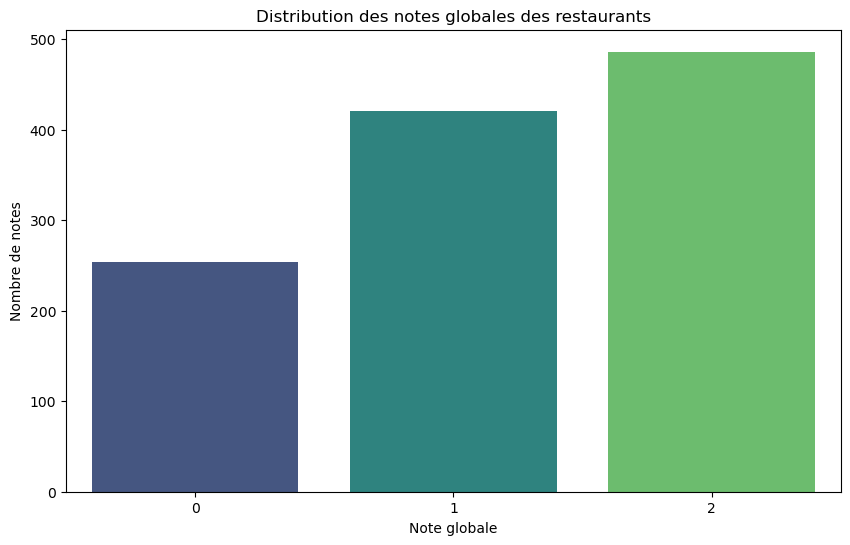

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall_Rating', data=ratings_df, palette='viridis')
plt.title('Distribution des notes globales des restaurants')
plt.xlabel('Note globale')
plt.ylabel('Nombre de notes')
plt.show()

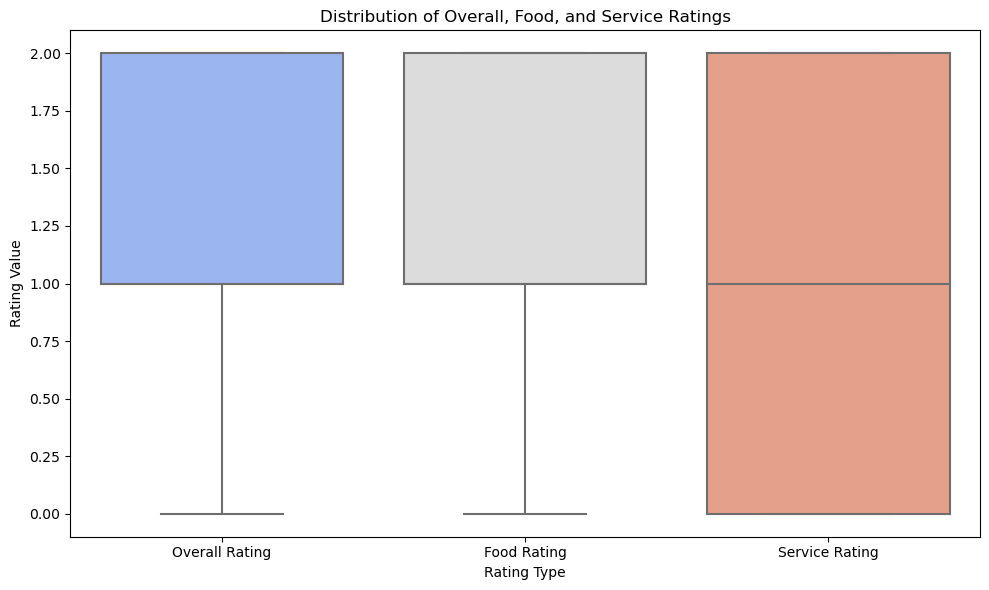

In [27]:
# Overall_Rating, Food_Rating, et Service_Rating
plt.figure(figsize=(10, 6))

# Créer le box plot en utilisant le DataFrame correct
sns.boxplot(data=ratings_df[['Overall_Rating', 'Food_Rating', 'Service_Rating']], palette='coolwarm')

# Titre et étiquettes
plt.title('Distribution of Overall, Food, and Service Ratings')
plt.xlabel('Rating Type')
plt.ylabel('Rating Value')

# Ajustement des étiquettes pour chaque type de note
plt.xticks([0, 1, 2], ['Overall Rating', 'Food Rating', 'Service Rating'])

# Ajustement de la mise en page
plt.tight_layout()

plt.show()

Le box plot montre que le service est mieux noté que la nourriture et l'évaluation générale, avec des notes généralement positives pour les trois catégories. Les évaluations sont assez homogènes, sans grandes variations ou valeurs aberrantes.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


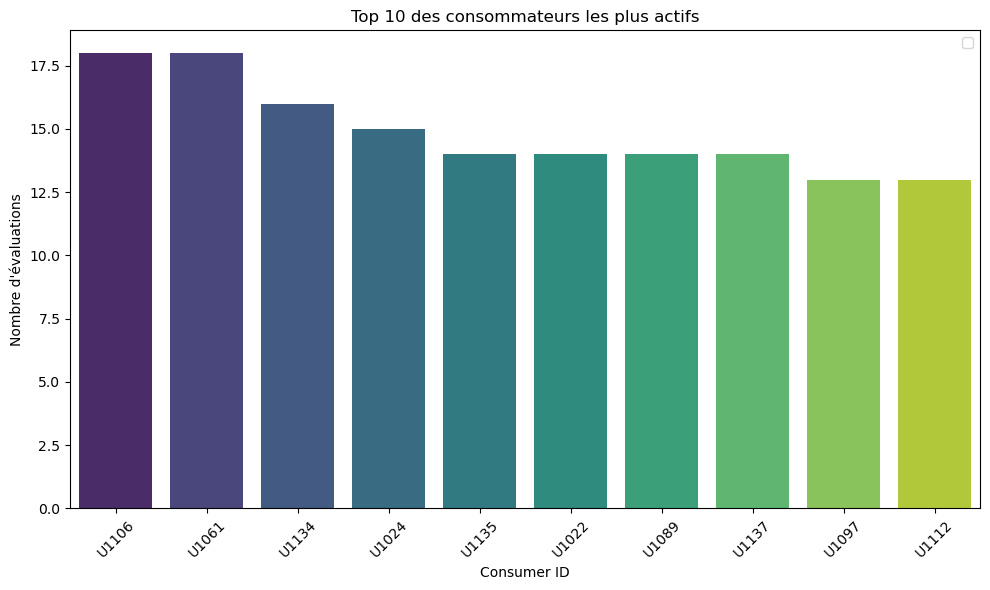

In [29]:
consumer_counts = ratings_df['Consumer_ID'].value_counts()

# Convertir en DataFrame pour faciliter la manipulation
consumer_counts_df = consumer_counts.reset_index()
consumer_counts_df.columns = ['Consumer_ID', 'Number_of_Ratings']

# Visualiser les 10 consommateurs les plus actifs
top_consumers = consumer_counts_df.nlargest(10, 'Number_of_Ratings')

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=top_consumers, x='Consumer_ID', y='Number_of_Ratings', palette='viridis')
plt.title('Top 10 des consommateurs les plus actifs')
plt.xlabel('Consumer ID')
plt.ylabel('Nombre d\'évaluations')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


In [13]:
print("Restaurants DataFrame:")
print(restaurants_df.describe(include='all'))

Restaurants DataFrame:
        Restaurant_ID  Name             City            State Country  \
count      130.000000   130              130              130     130   
unique            NaN   127                4                3       1   
top               NaN  Vips  San Luis Potosi  San Luis Potosi  Mexico   
freq              NaN     3               84               84     130   
mean    134012.784615   NaN              NaN              NaN     NaN   
std       1140.644582   NaN              NaN              NaN     NaN   
min     132560.000000   NaN              NaN              NaN     NaN   
25%     132831.000000   NaN              NaN              NaN     NaN   
50%     134994.000000   NaN              NaN              NaN     NaN   
75%     135050.750000   NaN              NaN              NaN     NaN   
max     135109.000000   NaN              NaN              NaN     NaN   

            Zip_Code    Latitude   Longitude Alcohol_Service Smoking_Allowed  \
count      56.000000

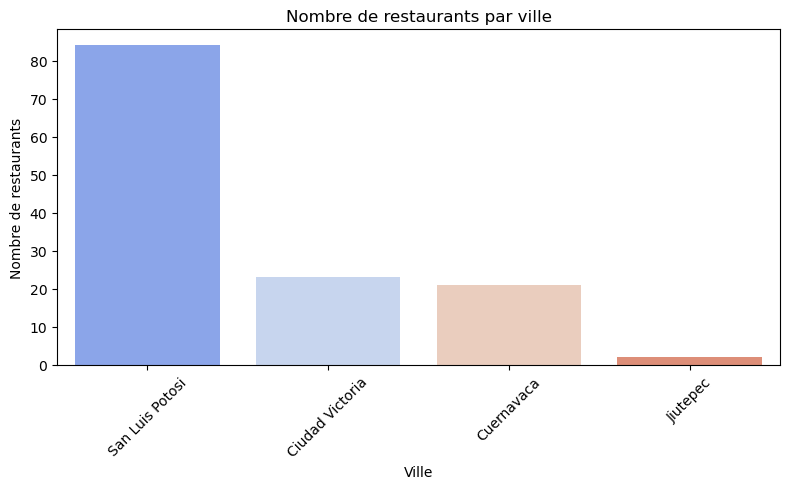

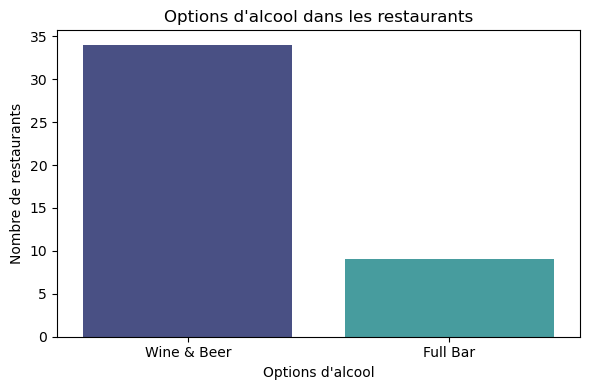

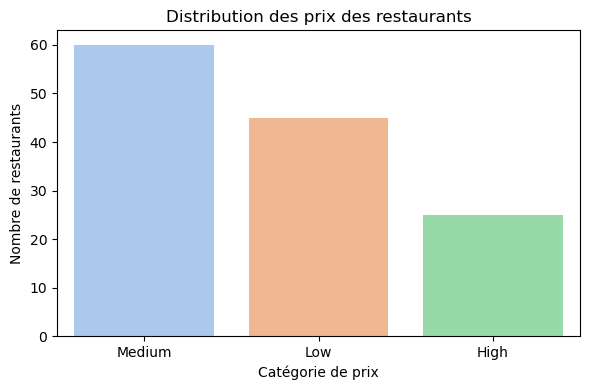

In [9]:
# Compter le nombre de restaurants par ville
city_counts = restaurants_df['City'].value_counts()

# Créer le graphique
plt.figure(figsize=(8, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')
plt.title('Nombre de restaurants par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre de restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Compter les options d'alcool
alcohol_counts = restaurants_df['Alcohol_Service'].value_counts()

# Créer le graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=alcohol_counts.index, y=alcohol_counts.values, palette='mako')
plt.title('Options d\'alcool dans les restaurants')
plt.xlabel('Options d\'alcool')
plt.ylabel('Nombre de restaurants')
plt.tight_layout()
plt.show()

# Compter les catégories de prix
price_counts = restaurants_df['Price'].value_counts()

# Créer le graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=price_counts.index, y=price_counts.values, palette='pastel')
plt.title('Distribution des prix des restaurants')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre de restaurants')
plt.tight_layout()
plt.show()


=> La majorité des restaurants se trouvent à San Luis Potosi, et beaucoup proposent des options d'alcool 

=>  La plupart des restaurants sont classés comme ayant un prix medium 

In [20]:
print("Restaurant Cuisines DataFrame:")
print(restaurant_cuisines_df.describe(include='all'))

Restaurant Cuisines DataFrame:
        Restaurant_ID  Cuisine
count      112.000000      112
unique            NaN       23
top               NaN  Mexican
freq              NaN       28
mean    133952.303571      NaN
std       1140.939259      NaN
min     132560.000000      NaN
25%     132812.000000      NaN
50%     134976.000000      NaN
75%     135048.250000      NaN
max     135109.000000      NaN


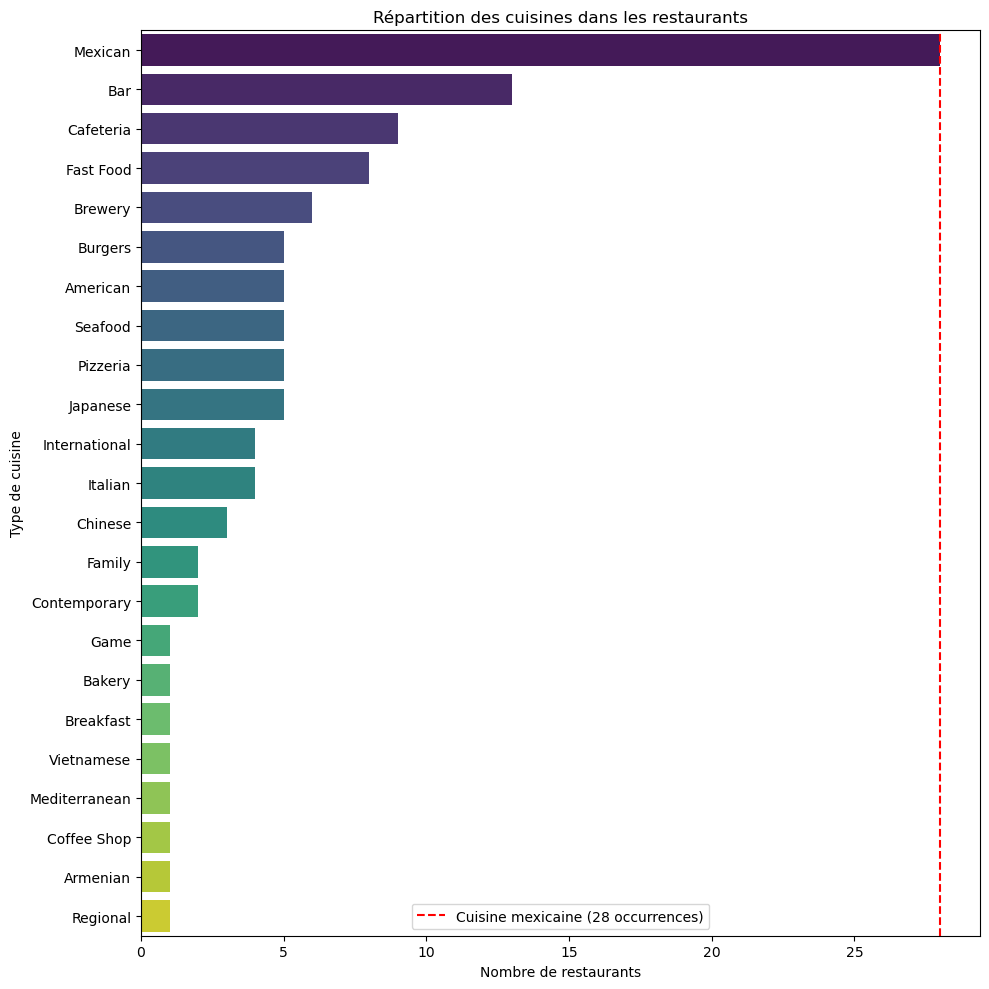

In [10]:
# Compter le nombre de restaurants par type de cuisine
cuisine_counts = restaurant_cuisines_df['Cuisine'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 10))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')
plt.title('Répartition des cuisines dans les restaurants')
plt.xlabel('Nombre de restaurants')
plt.ylabel('Type de cuisine')
plt.axvline(x=28, color='r', linestyle='--', label='Cuisine mexicaine (28 occurrences)')  
plt.legend()
plt.tight_layout()
plt.show()


=> La cuisine mexicaine est prédominante avec 28 occurrences.

In [11]:
print("Consumers DataFrame:")
print(consumers_df.describe(include='all'))

Consumers DataFrame:
       Consumer_ID             City            State Country    Latitude  \
count          138              138              138     138  138.000000   
unique         138                4                3       1         NaN   
top          U1001  San Luis Potosi  San Luis Potosi  Mexico         NaN   
freq             1               86               86     138         NaN   
mean           NaN              NaN              NaN     NaN   21.810389   
std            NaN              NaN              NaN     NaN    1.552529   
min            NaN              NaN              NaN     NaN   18.813348   
25%            NaN              NaN              NaN     NaN   22.126030   
50%            NaN              NaN              NaN     NaN   22.150497   
75%            NaN              NaN              NaN     NaN   22.186642   
max            NaN              NaN              NaN     NaN   23.771030   

         Longitude Smoker Drink_Level Transportation_Method Marita

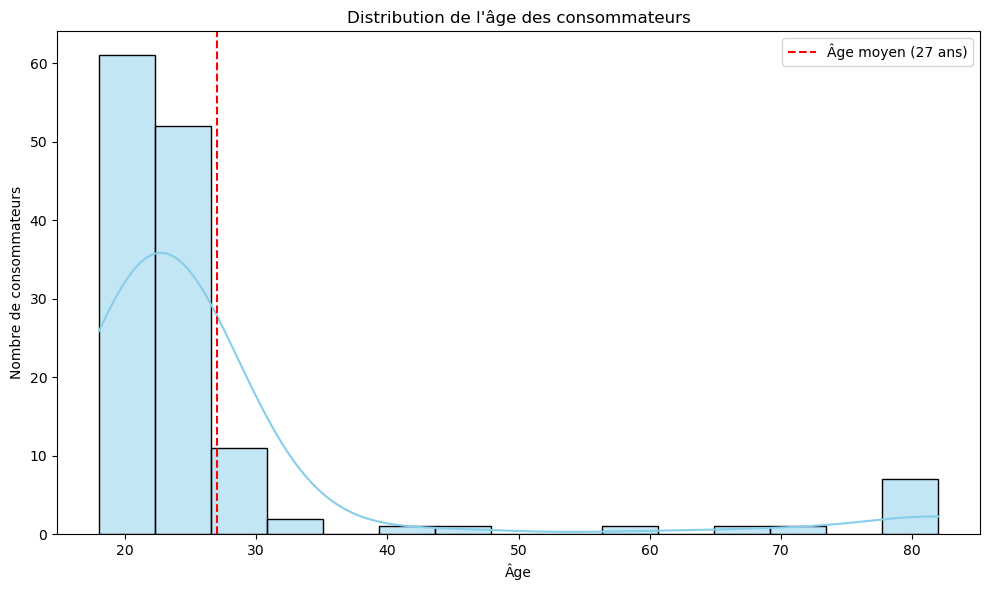

In [47]:
# Créer le graphique de distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(consumers_df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution de l\'âge des consommateurs')
plt.xlabel('Âge')
plt.ylabel('Nombre de consommateurs')
plt.axvline(x=27, color='r', linestyle='--', label='Âge moyen (27 ans)')
plt.legend()
plt.tight_layout()
plt.show()




=> La majorité des consommateurs sont jeunes (âge moyen de 27 ans) et étudiants avec un budget medium 

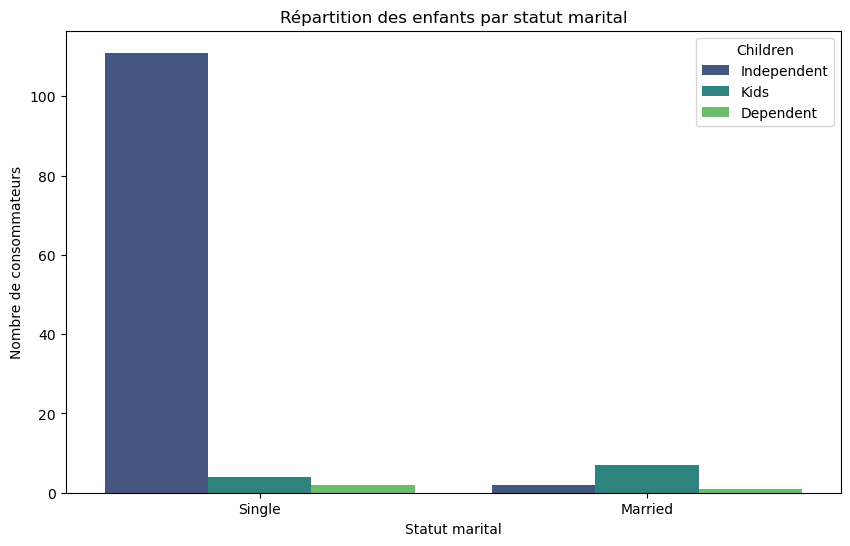

In [12]:
# Statut marital vs enfants
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Children', data=consumers_df, palette='viridis')
plt.title('Répartition des enfants par statut marital')
plt.xlabel('Statut marital')
plt.ylabel('Nombre de consommateurs')
plt.show()

=> La plupart des répondants sont "Single" (124 consommateurs, environ 90 %) et ont pas des enfants

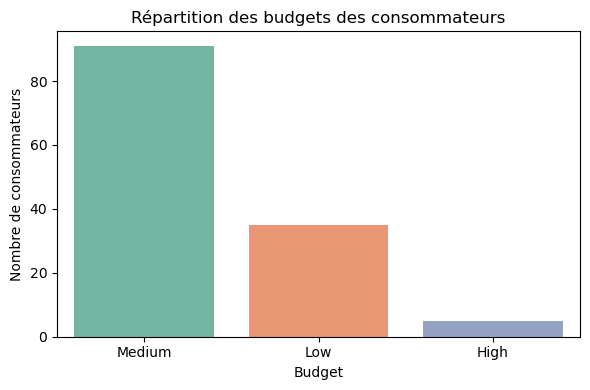

In [13]:
# Compter les budgets
budget_counts = consumers_df['Budget'].value_counts()

# Créer le graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=budget_counts.index, y=budget_counts.values, palette='Set2')
plt.title('Répartition des budgets des consommateurs')
plt.xlabel('Budget')
plt.ylabel('Nombre de consommateurs')
plt.tight_layout()
plt.show()



=>la majorité des consommateurs on des budget medium 

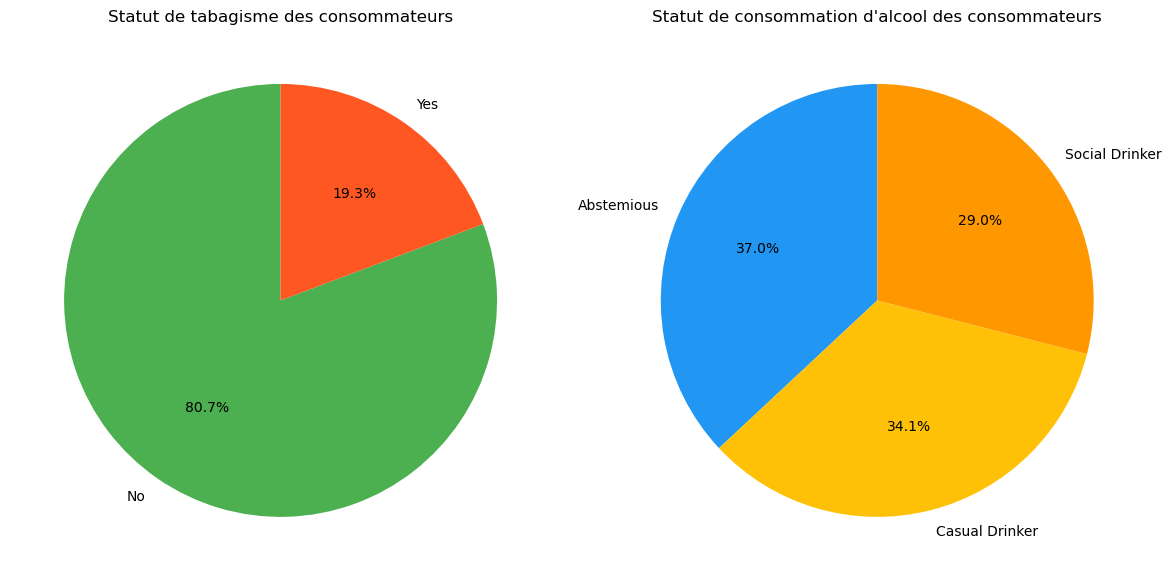

In [14]:
# Compter le nombre de fumeurs
smoker_counts = consumers_df['Smoker'].value_counts()

# Compter le nombre de consommateurs d'alcool
alcohol_counts = consumers_df['Drink_Level'].value_counts()

# Créer un DataFrame combiné
combined_counts = pd.DataFrame({
    'Fumeur': smoker_counts,
    'Alcoolique': alcohol_counts
}).fillna(0)  # Remplacer NaN par 0 pour les valeurs manquantes

# Créer un graphique circulaire
plt.figure(figsize=(12, 6))

# Diagramme circulaire pour les fumeurs
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5722'])  # Couleurs modifiées
plt.title('Statut de tabagisme des consommateurs')

# Diagramme circulaire pour les consommateurs d'alcool
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2196F3', '#FFC107', '#FF9800'])  # Trois couleurs pour trois niveaux
plt.title('Statut de consommation d\'alcool des consommateurs')

plt.tight_layout()
plt.show()


=> La majorité ne fument pas mais peu consommateurs d'alcool

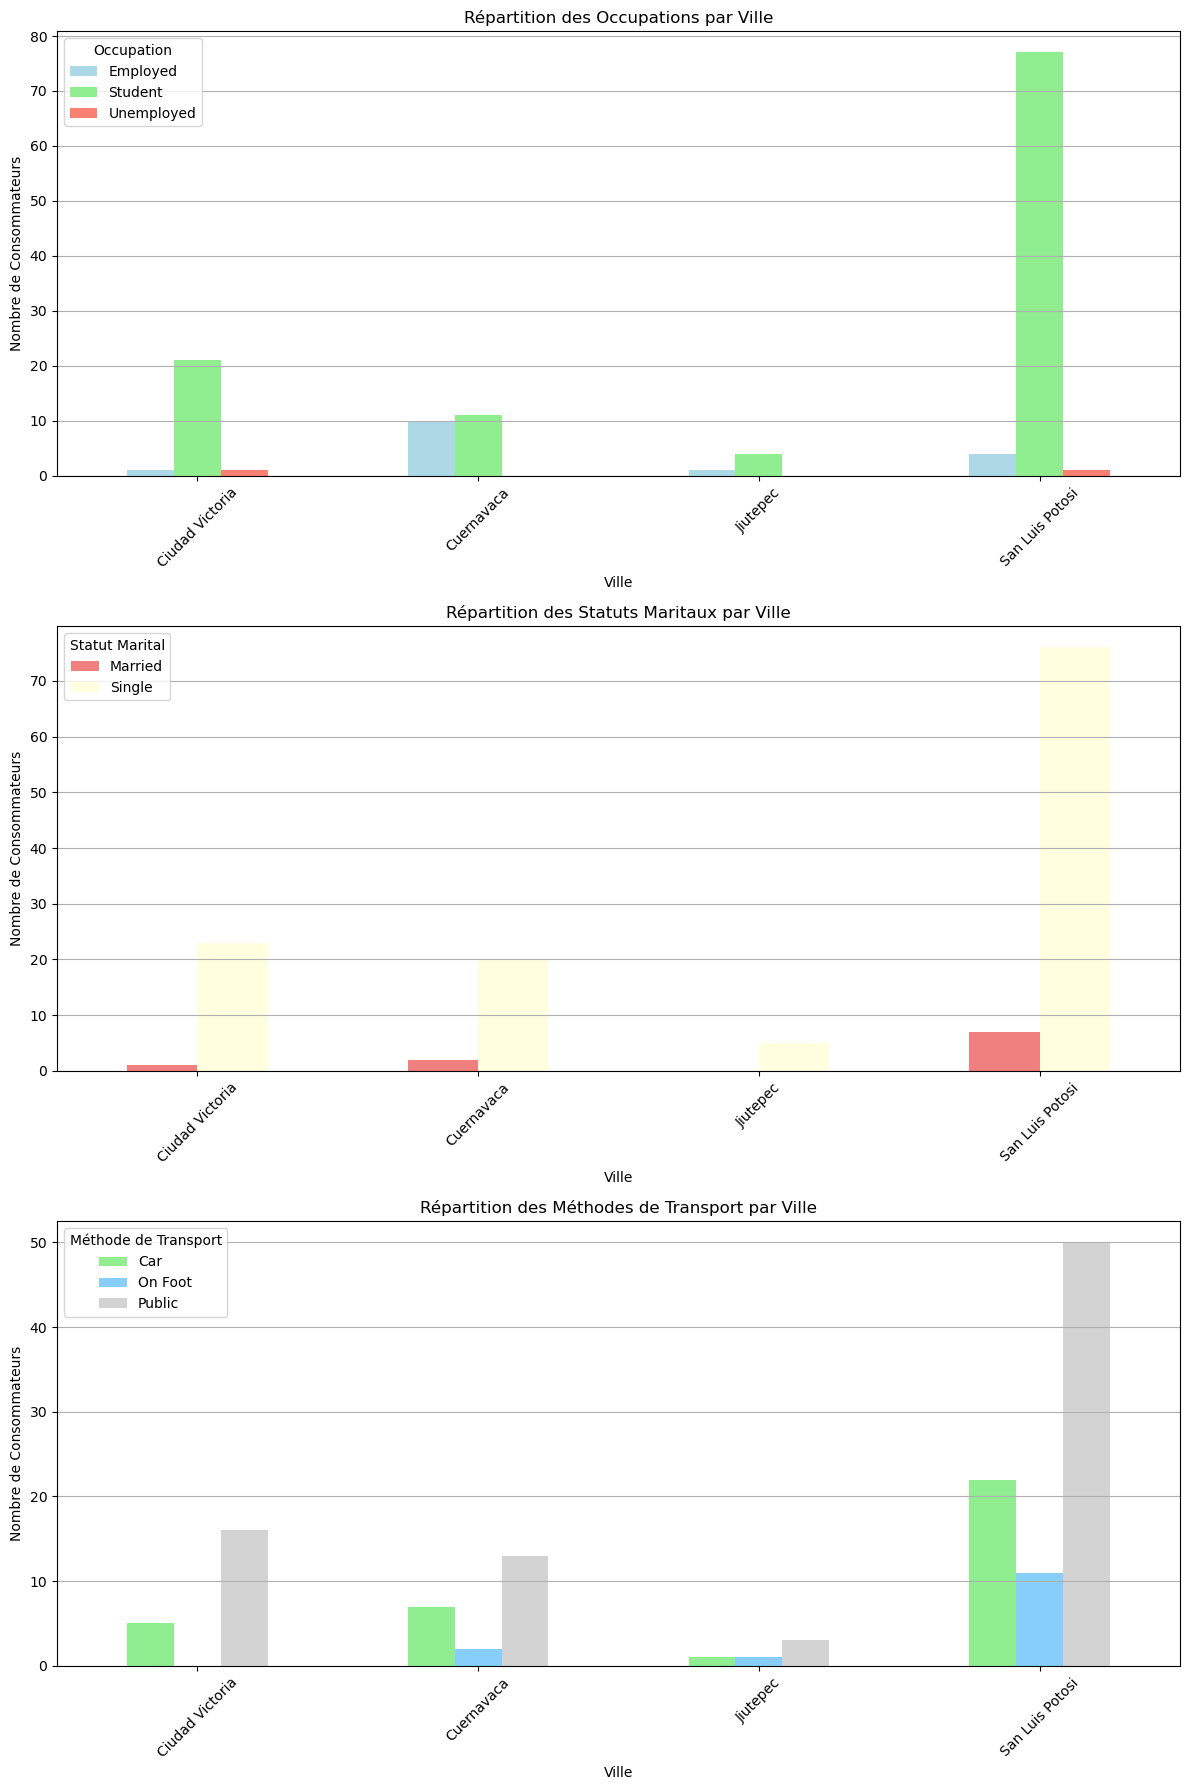

In [15]:
# Comptons le nombre de consommateurs par ville et par occupation
city_occupation_counts = consumers_df.groupby(['City', 'Occupation']).size().unstack(fill_value=0)

# Comptons le nombre de consommateurs par ville et par statut marital
city_marital_counts = consumers_df.groupby(['City', 'Marital_Status']).size().unstack(fill_value=0)

# Comptons le nombre de consommateurs par ville et par méthode de transport
city_transport_counts = consumers_df.groupby(['City', 'Transportation_Method']).size().unstack(fill_value=0)

# Créons une figure avec trois sous-graphiques
fig, ax = plt.subplots(3, 1, figsize=(12, 18))  # Augmentation de la taille de la figure

# Graphique 1: Répartition des occupations par ville
city_occupation_counts.plot(kind='bar', ax=ax[0], color=['lightblue', 'lightgreen', 'salmon'])
ax[0].set_title('Répartition des Occupations par Ville')
ax[0].set_ylabel('Nombre de Consommateurs')
ax[0].set_xlabel('Ville')
ax[0].legend(title='Occupation', labels=city_occupation_counts.columns)
ax[0].grid(axis='y')
ax[0].tick_params(axis='x', rotation=45)  # Rotation des labels des villes

# Graphique 2: Répartition des statuts maritaux par ville
city_marital_counts.plot(kind='bar', ax=ax[1], color=['lightcoral', 'lightyellow'])
ax[1].set_title('Répartition des Statuts Maritaux par Ville')
ax[1].set_ylabel('Nombre de Consommateurs')
ax[1].set_xlabel('Ville')
ax[1].legend(title='Statut Marital', labels=city_marital_counts.columns)
ax[1].grid(axis='y')
ax[1].tick_params(axis='x', rotation=45)  # Rotation des labels des villes

# Graphique 3: Répartition des méthodes de transport par ville
city_transport_counts.plot(kind='bar', ax=ax[2], color=['lightgreen', 'lightskyblue', 'lightgrey'])
ax[2].set_title('Répartition des Méthodes de Transport par Ville')
ax[2].set_ylabel('Nombre de Consommateurs')
ax[2].set_xlabel('Ville')
ax[2].legend(title='Méthode de Transport', labels=city_transport_counts.columns)
ax[2].grid(axis='y')
ax[2].tick_params(axis='x', rotation=45)  # Rotation des labels des villes

plt.tight_layout()
plt.show()


In [57]:
print("\nConsumer Preferences DataFrame:")
print(consumer_preferences_df.describe(include='all'))


Consumer Preferences DataFrame:
       Consumer_ID Preferred_Cuisine
count          330               330
unique         138               101
top          U1135           Mexican
freq           103                97


=> La cuisine mexicaine est la plus populaire parmi les consommateurs (97 consommateurs préfèrent la cuisine mexicaine)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


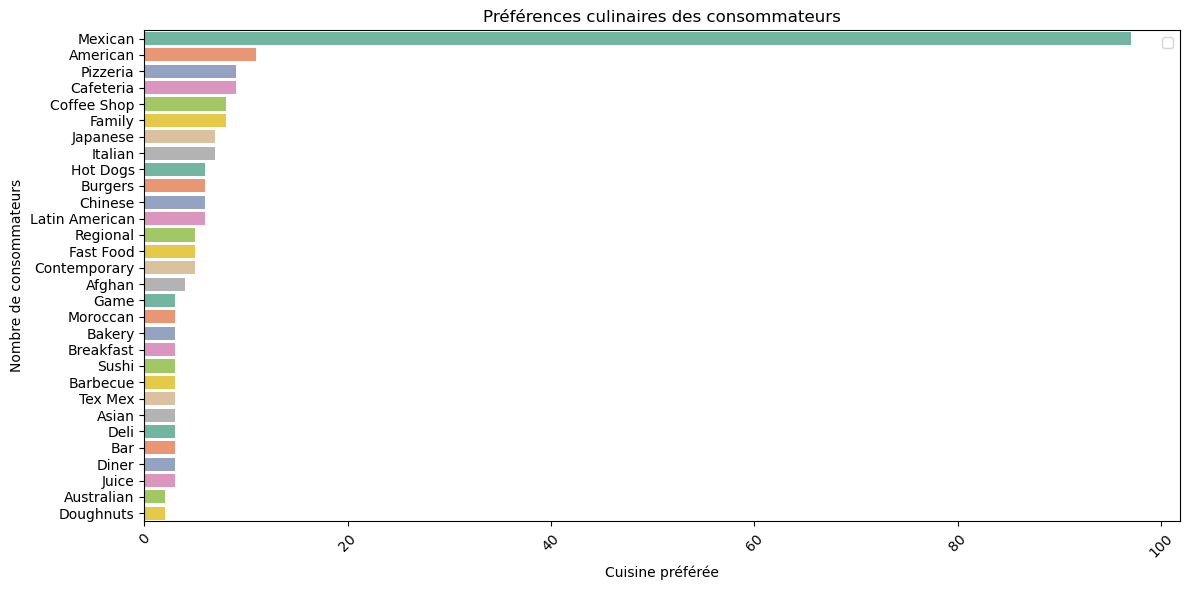

In [16]:
# Compter le nombre de consommateurs par type de cuisine préférée
preference_counts = consumer_preferences_df['Preferred_Cuisine'].value_counts()

# Obtenir les 30 cuisines les plus populaires
top_30_preferences = preference_counts.nlargest(30)

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_preferences.values, y=top_30_preferences.index, palette='Set2')
plt.title('Préférences culinaires des consommateurs')
plt.xlabel('Cuisine préférée')
plt.ylabel('Nombre de consommateurs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



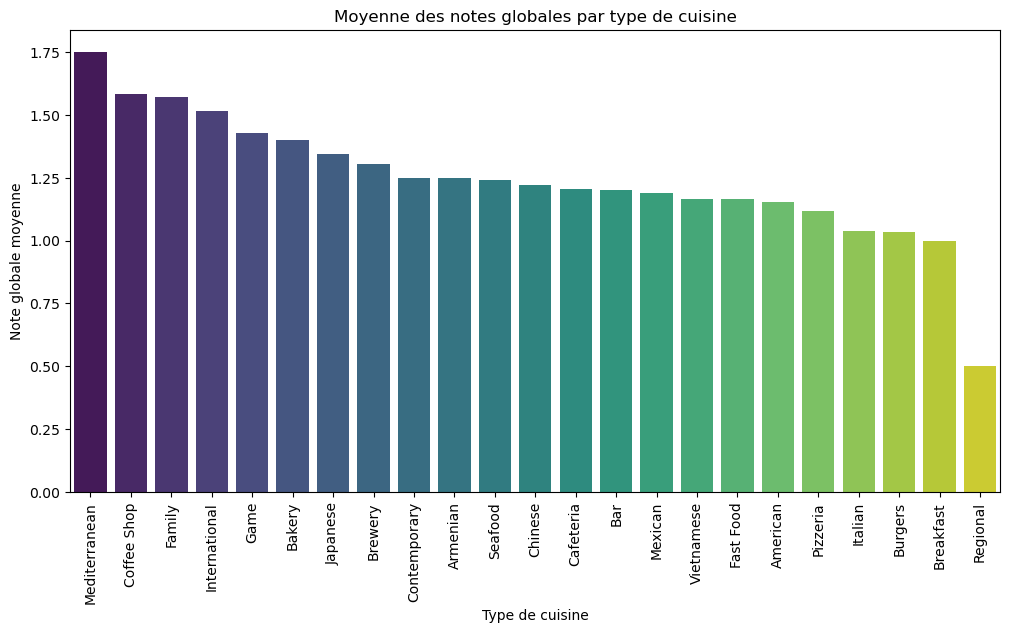

In [17]:

ratings_cuisine_df = pd.merge(ratings_df, restaurant_cuisines_df, on='Restaurant_ID')

# la moyenne des notes globales pour chaque type de cuisine
avg_ratings_by_cuisine = ratings_cuisine_df.groupby('Cuisine')['Overall_Rating'].mean().sort_values(ascending=False)

# Visualisation de la moyenne des notes globales par type de cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings_by_cuisine.index, y=avg_ratings_by_cuisine.values, palette='viridis')
plt.title('Moyenne des notes globales par type de cuisine')
plt.xticks(rotation=90)
plt.ylabel('Note globale moyenne')
plt.xlabel('Type de cuisine')
plt.show()


 Interprétation :

Cette analyse permet de voir quels types de cuisines sont les mieux notés en moyenne.
Par exemple, si les restaurants qui servent de la cuisine mexicaine ont une note globale plus élevée que ceux qui servent de la nourriture rapide, cela pourrait signifier que les clients préfèrent la qualité de la cuisine mexicaine.
Cela aide à identifier quelles cuisines sont les plus appréciées et pourraient être favorisées pour améliorer l'offre des restaurants.

2.Lien entre les notes de nourriture, service et la note globale

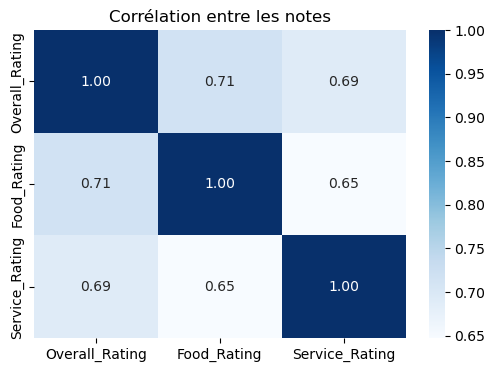

In [18]:
# Matrice de corrélation
corr_matrix = ratings_df[['Overall_Rating', 'Food_Rating', 'Service_Rating']].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Corrélation entre les notes')
plt.show()


Interprétation :Si la corrélation entre les Food_Rating et Overall_Rating est élevée, cela signifie que la qualité de la nourriture a un grand impact sur la satisfaction globale.
Une faible corrélation entre Service_Rating et Overall_Rating indique que le service pourrait avoir moins d'influence sur la note globale des restaurants.

Taille de la table fusionnée: (330, 15)


C:\Users\ameni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


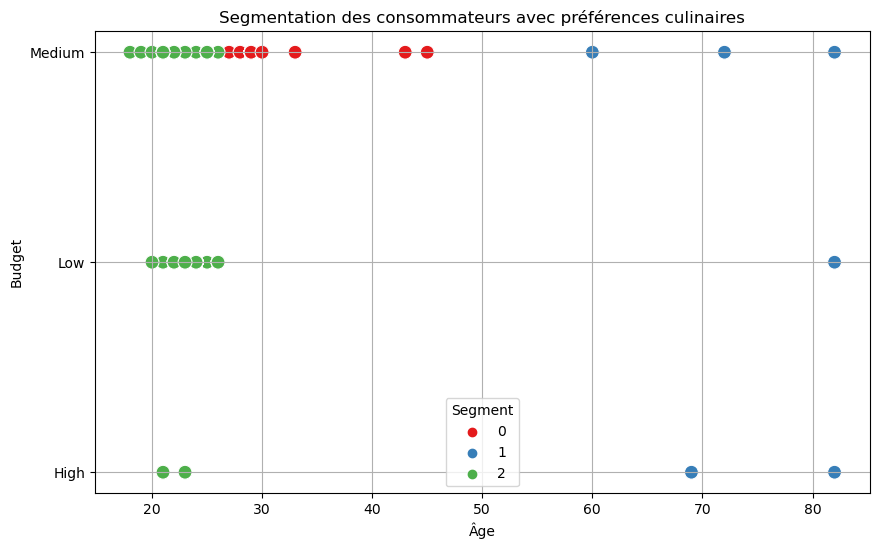

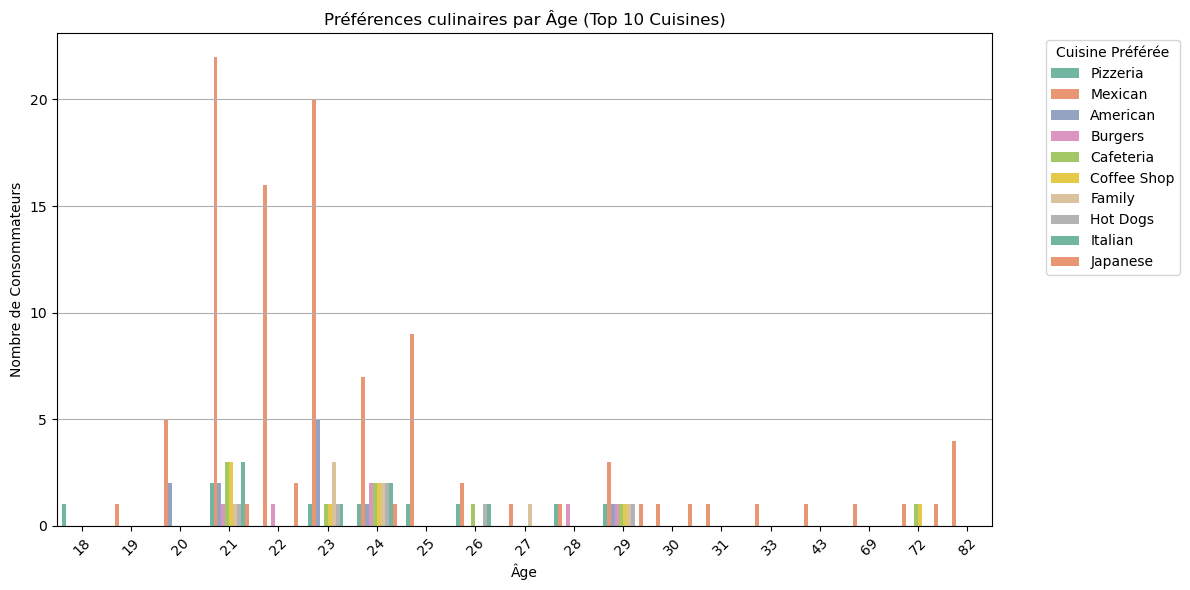

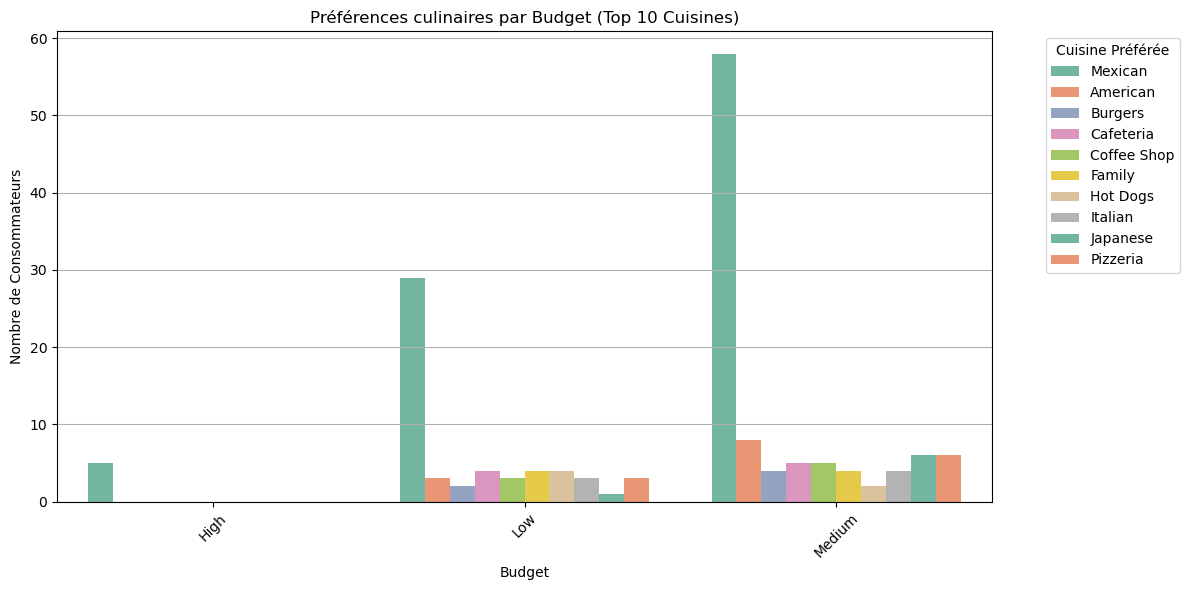

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fusionner les tables sur la colonne 'Consumer_ID'
merged_df = pd.merge(consumers_df, consumer_preferences_df, on='Consumer_ID')

# Vérifier la forme de la table fusionnée
print("Taille de la table fusionnée:", merged_df.shape)

# Transformer les colonnes catégorielles en variables numériques
combined_features = pd.get_dummies(merged_df[['Age', 'Budget', 'Smoker', 'Drink_Level', 'Preferred_Cuisine']], drop_first=True)

# Créer le modèle KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Segmentation des consommateurs
merged_df['Segment'] = kmeans.fit_predict(combined_features)

# Visualisation Age vs Budget, colorée par segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Age', y='Budget', hue='Segment', palette='Set1', s=100)
plt.title('Segmentation des consommateurs avec préférences culinaires')
plt.xlabel('Âge')
plt.ylabel('Budget')
plt.legend(title='Segment')
plt.grid()
plt.show()

# Compter le nombre de consommateurs par âge et cuisine préférée
age_cuisine_counts = merged_df.groupby(['Age', 'Preferred_Cuisine']).size().reset_index(name='Consumer_Count')

# Obtenir les cuisines les plus populaires (top 10)
top_cuisines = merged_df['Preferred_Cuisine'].value_counts().nlargest(10).index

# Compter le nombre de consommateurs par âge et par cuisine
age_cuisine_counts = merged_df.groupby(['Age', 'Preferred_Cuisine']).size().reset_index(name='Consumer_Count')

# Filtrer les données pour ne garder que les 10 cuisines les plus populaires
top_age_cuisine_counts = age_cuisine_counts[age_cuisine_counts['Preferred_Cuisine'].isin(top_cuisines)]

# Visualiser les préférences culinaires par âge pour les 10 cuisines les plus populaires avec un barplot empilé
plt.figure(figsize=(12, 6))

# Créer le diagramme à barres empilées
sns.barplot(data=top_age_cuisine_counts, x='Age', y='Consumer_Count', hue='Preferred_Cuisine', palette='Set2')

plt.title('Préférences culinaires par Âge (Top 10 Cuisines)')
plt.xlabel('Âge')
plt.ylabel('Nombre de Consommateurs')

plt.legend(title='Cuisine Préférée', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Ajuste le layout pour éviter le débordement
plt.show()


# 1. Obtenir les cuisines les plus populaires (top 10)
top_cuisines = merged_df['Preferred_Cuisine'].value_counts().nlargest(10).index

# 2. Compter le nombre de consommateurs par budget et par cuisine
budget_cuisine_counts = merged_df.groupby(['Budget', 'Preferred_Cuisine']).size().reset_index(name='Consumer_Count')

# 3. Filtrer les données pour ne garder que les 10 cuisines les plus populaires
top_budget_cuisine_counts = budget_cuisine_counts[budget_cuisine_counts['Preferred_Cuisine'].isin(top_cuisines)]

# 4. Visualiser les préférences culinaires par budget pour les 10 cuisines les plus populaires
plt.figure(figsize=(12, 6))

# Diagramme à barres empilées
sns.barplot(data=top_budget_cuisine_counts, x='Budget', y='Consumer_Count', hue='Preferred_Cuisine', palette='Set2')

plt.title('Préférences culinaires par Budget (Top 10 Cuisines)')
plt.xlabel('Budget')
plt.ylabel('Nombre de Consommateurs')
plt.legend(title='Cuisine Préférée', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Ajuste le layout pour éviter le débordement
plt.show()

7.Analyse géographique des restaurants

Interprétation : Cette carte permet de visualiser où se situent les restaurants, et on peut analyser si les restaurants dans certaines régions ont des évaluations plus élevées ou proposent des types de cuisine spécifiques.